# Load Data

In [1]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT_DIR = Path.cwd().parent.parent.parent
PROJECT_ROOT_DIR

file_paths_defending  = ["/data/processed/bundesliga/defending.csv",
               "/data/processed/la_liga/defending.csv",
               "/data/processed/ligue_1/defending.csv",
               "/data/processed/premier_league/defending.csv",
               "/data/processed/serie_a/defending.csv", 
               ]

file_paths_standard_stats  = ["/data/standard_stats_bundesliga.csv",
            "/data/standard_stats_la_liga.csv",
            "/data/standard_stats_ligue_1.csv",
            "/data/standard_stats_premier_league.csv",
            "/data/standard_stats_serie_a.csv",
               ]

PROJECT_ROOT_DIR

defending = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_defending:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    defending = pd.concat([defending, temp_df], ignore_index=True)
defending = defending.set_index("player")

standard_stats = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_standard_stats:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    standard_stats = pd.concat([standard_stats, temp_df], ignore_index=True)
standard_stats = standard_stats.set_index("player")

defending

,ball_recovery_total,ball_recovery_successful,ball_recovery_offensive_total,ball_recovery_offensive_successful,ball_recovery_failed,pressure_on_opponent,pressure_on_opponent_defending_third,pressure_on_opponent_middle_third,pressure_on_opponent_attacking_third,counterpressing_total,...,fouls_wins_a_penalty_per_match,fouls_yellow_card_per_match,fouls_second_yellow_card_per_match,fouls_red_card_per_match,bad_behaviour_total_per_match,bad_behaviour_yellow_card_per_match,bad_behaviour_second_yellow_card_per_match,bad_behaviour_red_card_per_match,total_yellow_per_match,total_red_per_match
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,108.0,103.0,0,0,5,359.0,65.0,190.0,104.0,107.0,...,0.0,0.011,0.000,0.000,0.011,0.011,0.0,0.0,0.022,0.000
Adam Hloušek,8.0,8.0,0,0,0,52.0,32.0,18.0,2.0,15.0,...,0.0,0.011,0.000,0.000,0.000,0.000,0.0,0.0,0.011,0.000
Adelino André Vieira Freitas,133.0,130.0,0,0,3,296.0,106.0,149.0,41.0,95.0,...,0.0,0.033,0.000,0.000,0.000,0.000,0.0,0.0,0.033,0.000
Admir Mehmedi,76.0,73.0,1,1,3,315.0,51.0,159.0,105.0,100.0,...,0.0,0.011,0.000,0.000,0.011,0.011,0.0,0.0,0.022,0.000
Adnan Januzaj,6.0,6.0,0,0,0,37.0,3.0,16.0,18.0,14.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ľubomír Tupta,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000
Łukasz Skorupski,148.0,148.0,0,0,0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.022,0.022,0.0,0.0,0.022,0.000
Ştefan Daniel Radu,71.0,66.0,0,0,5,141.0,64.0,63.0,14.0,41.0,...,0.0,0.022,0.000,0.011,0.011,0.011,0.0,0.0,0.033,0.011


In [2]:
# merge both df's
df = pd.merge(left=standard_stats[["team","position","match_played","minutes_played"]],
         right=defending,
         left_index=True, 
         right_index=True,
         how="left")

df
# keep in defedning only players with min. matches played
requirement_mask = (df["match_played"] > 1) & (df["minutes_played"] > 90)
defending_columns = list(defending.columns) + ["position"]
defending = df.loc[requirement_mask, defending_columns]
df = df.loc[requirement_mask, :]

defending

,ball_recovery_total,ball_recovery_successful,ball_recovery_offensive_total,ball_recovery_offensive_successful,ball_recovery_failed,pressure_on_opponent,pressure_on_opponent_defending_third,pressure_on_opponent_middle_third,pressure_on_opponent_attacking_third,counterpressing_total,...,fouls_yellow_card_per_match,fouls_second_yellow_card_per_match,fouls_red_card_per_match,bad_behaviour_total_per_match,bad_behaviour_yellow_card_per_match,bad_behaviour_second_yellow_card_per_match,bad_behaviour_red_card_per_match,total_yellow_per_match,total_red_per_match,position
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,108.0,103.0,0,0,5,359.0,65.0,190.0,104.0,107.0,...,0.011,0.000,0.000,0.011,0.011,0.0,0.0,0.022,0.000,Midfielder
Adam Hloušek,8.0,8.0,0,0,0,52.0,32.0,18.0,2.0,15.0,...,0.011,0.000,0.000,0.000,0.000,0.0,0.0,0.011,0.000,Defender
Adelino André Vieira Freitas,133.0,130.0,0,0,3,296.0,106.0,149.0,41.0,95.0,...,0.033,0.000,0.000,0.000,0.000,0.0,0.0,0.033,0.000,Forward
Admir Mehmedi,76.0,73.0,1,1,3,315.0,51.0,159.0,105.0,100.0,...,0.011,0.000,0.000,0.011,0.011,0.0,0.0,0.022,0.000,Midfielder
Adnan Januzaj,6.0,6.0,0,0,0,37.0,3.0,16.0,18.0,14.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Édgar Osvaldo Barreto Cáceres,91.0,86.0,1,1,5,649.0,255.0,311.0,83.0,195.0,...,0.033,0.000,0.000,0.000,0.000,0.0,0.0,0.033,0.000,Midfielder
Łukasz Skorupski,148.0,148.0,0,0,0,3.0,3.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.022,0.022,0.0,0.0,0.022,0.000,Goalkeeper
Ştefan Daniel Radu,71.0,66.0,0,0,5,141.0,64.0,63.0,14.0,41.0,...,0.022,0.000,0.011,0.011,0.011,0.0,0.0,0.033,0.011,Defender


# Correlation

In [3]:
def plot_custom_correlation_heatmap(corr_matrix, title='Feature Correlations with Player Positions'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.colors as mcolors
    colors = [
        '#67001F',  # Extremely negative (<-0.9)
        '#B2182B',  # Very strong negative (-0.9 to -0.7)
        '#D6604D',  # Strong negative (-0.7 to -0.5)
        '#F4A582',  # Moderate negative (-0.5 to -0.3)
        '#FDDBC7',  # Weak negative (-0.3 to -0.1)
        '#FFFFFF',  # Negligible (-0.1 to 0.1)
        '#D1E5F0',  # Weak positive (0.1 to 0.3)
        '#92C5DE',  # Moderate positive (0.3 to 0.5)
        '#4393C3',  # Strong positive (0.5 to 0.7)
        '#2166AC',  # Very strong positive (0.7 to 0.9)
        '#053061',  # Extremely positive (>0.9)
    ]
    
    bounds = [-1.0, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    norm = mcolors.BoundaryNorm(bounds, len(colors))
    cmap = mcolors.ListedColormap(colors)
    
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap=cmap,
        norm=norm,
        fmt='.2f',
        linewidth=0.5,
        xticklabels=True,
        yticklabels=True
    )
    
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticks([-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95])
    cbar.set_ticklabels([
        'Extremely\nNegative', 'Very Strong\nNegative', 
        'Strong\nNegative', 'Moderate\nNegative', 
        'Weak\nNegative', 'Negligible', 
        'Weak\nPositive', 'Moderate\nPositive',
        'Strong\nPositive', 'Very Strong\nPositive',
        'Extremely\nPositive'
    ])
    cbar.ax.tick_params(labelsize=6)

    plt.title(title)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.subplots_adjust(left=0.3)
    plt.show()

def compute_position_correlations(df, position_col='position', min_abs_corr=None):
    # Ensure position column is categorical
    df[position_col] = df[position_col].astype('category')
    
    # One-hot encode the position column
    position_dummies = pd.get_dummies(df[position_col], prefix=position_col)
    
    # Select only numerical columns
    numerical_df = df.select_dtypes(include='number')
    
    # Combine numerical and one-hot encoded data
    combined_df = pd.concat([numerical_df, position_dummies], axis=1)
    
    # Compute correlation matrix
    corr_matrix = combined_df.corr(method='pearson')
    
    # Extract correlations between numerical features and positions
    position_corr = corr_matrix[position_dummies.columns].loc[numerical_df.columns]
    
    # Filter features with at least one absolute correlation >= threshold
    if min_abs_corr is not None:
        mask = position_corr.abs().ge(min_abs_corr).any(axis=1)
        filtered_position_corr = position_corr[mask]
        return filtered_position_corr
    return position_corr


target_column = "position"
columns_relative_values = [col for col in df.columns if col.endswith("_%") and col != target_column]
columns_per_match = [col for col in df.columns if col.endswith("_per_match") and col != target_column]
columns_absolute_values = [col for col in df.columns if not col.endswith("_%") and not col.endswith("_per_match") and col != target_column and col != "match_played" and col != "minutes_played" and col != "team"]


## Relative Values

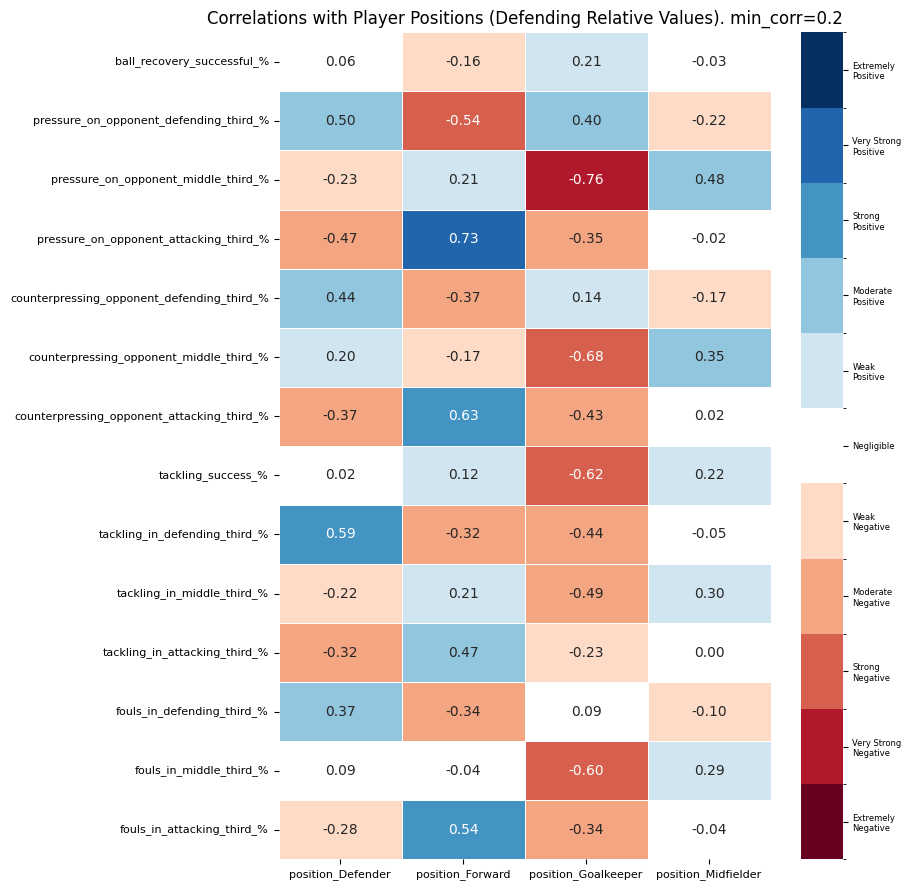

(14, 4)


In [4]:
df_columns_relative_values = defending[columns_relative_values].round(4)
df_columns_relative_values['position'] = defending['position'].astype('category')

min_corr = 0.2
position_corr = compute_position_correlations(df_columns_relative_values, position_col='position', min_abs_corr=min_corr)
plot_custom_correlation_heatmap(position_corr, title=f'Correlations with Player Positions (Defending Relative Values). min_corr={min_corr}')
print(position_corr.shape)

## Absolute Values

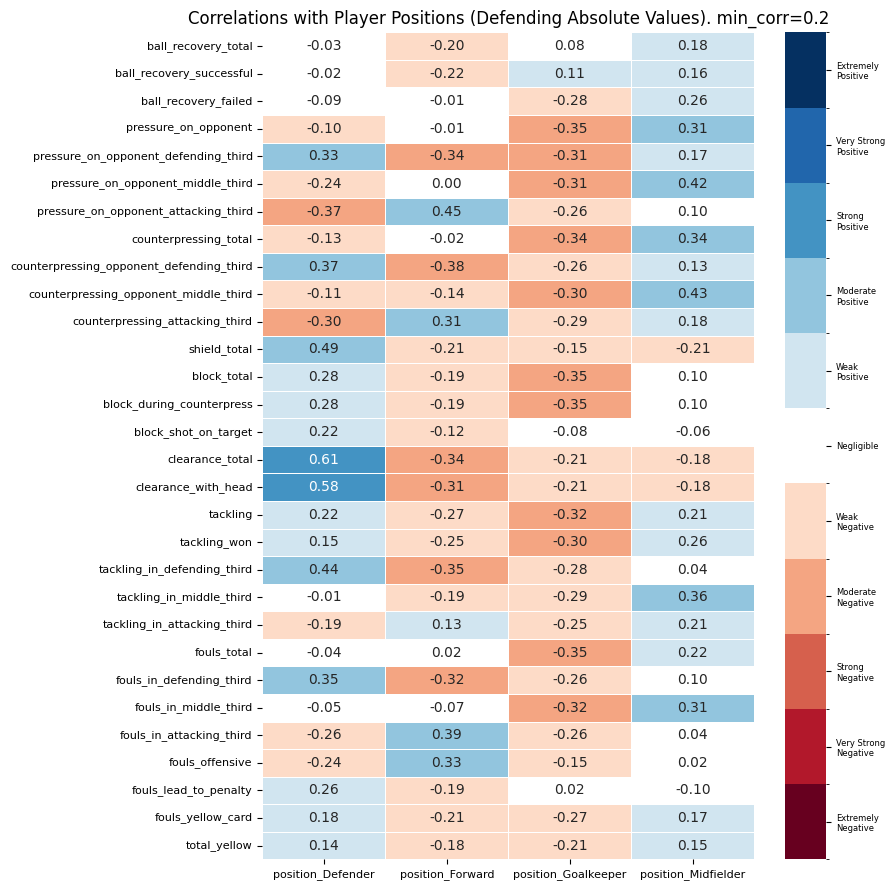

(30, 4)


In [5]:
df_absolute_values = defending[columns_absolute_values].round(4)
df_absolute_values['position'] = defending['position'].astype('category')

min_corr=0.2
position_corr = compute_position_correlations(df_absolute_values, position_col='position', min_abs_corr=min_corr)
plot_custom_correlation_heatmap(position_corr,title=f'Correlations with Player Positions (Defending Absolute Values). min_corr={min_corr}')
print(position_corr.shape)

## Values per Match

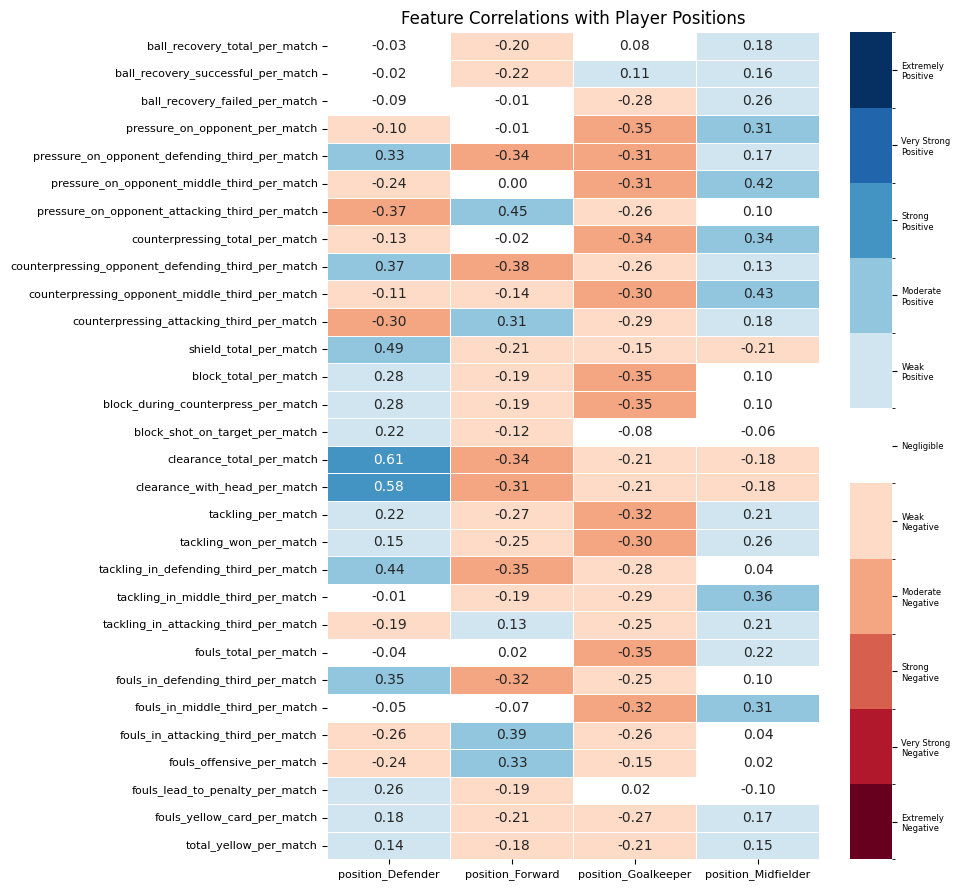

(30, 4)


In [6]:
df_columns_per_match = defending[columns_per_match].round(4)
df_columns_per_match['position'] = defending['position'].astype('category')

position_corr = compute_position_correlations(df_columns_per_match, position_col='position', min_abs_corr=0.2)
plot_custom_correlation_heatmap(position_corr)
print(position_corr.shape)

# Fit model, get shape values, and cluster

In [45]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_absolute_values.drop(columns=["position"])
y = df_absolute_values["position"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ✅ Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled data
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    eval_metric='mlogloss'
)
model.fit(X_train_scaled, y_train)

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X)

shap_values_class0 = shap_values[:, :, 0]  # shape: (2517, 44)
shap_df_class0 = pd.DataFrame(shap_values_class0, columns=X.columns)
shap_df_class0

,ball_recovery_total,ball_recovery_successful,ball_recovery_offensive_total,ball_recovery_offensive_successful,ball_recovery_failed,pressure_on_opponent,pressure_on_opponent_defending_third,pressure_on_opponent_middle_third,pressure_on_opponent_attacking_third,counterpressing_total,...,fouls_wins_a_penalty,fouls_yellow_card,fouls_second_yellow_card,fouls_red_card,bad_behaviour_total,bad_behaviour_yellow_card,bad_behaviour_second_yellow_card,bad_behaviour_red_card,total_yellow,total_red
0,-0.095163,-0.036481,0.0,0.0,-0.162258,-0.023635,0.502760,-3.119051,-0.974494,-0.062303,...,0.0,0.022336,0.0,0.0,-0.013599,-0.033923,0.0,0.0,-0.016790,0.002066
1,-0.089481,-0.032189,0.0,0.0,-0.093517,-0.021124,0.497234,-3.245459,-1.004279,-0.059941,...,0.0,0.022336,0.0,0.0,0.003019,0.004368,0.0,0.0,-0.019907,0.002066
2,-0.171795,-0.037267,0.0,0.0,-0.266087,-0.008514,0.426387,-2.667836,-0.903908,-0.032010,...,0.0,0.041861,0.0,0.0,0.002167,0.005259,0.0,0.0,-0.016790,0.002066
3,-0.092842,-0.032189,0.0,0.0,-0.199755,-0.024960,0.507178,-3.139701,-0.971011,-0.059334,...,0.0,0.022336,0.0,0.0,-0.013599,-0.033923,0.0,0.0,-0.016790,0.002066
4,-0.104069,-0.032952,0.0,0.0,-0.199891,-0.039800,0.554778,-4.141338,-1.110898,-0.008190,...,0.0,-0.009189,0.0,0.0,0.002364,0.004368,0.0,0.0,-0.022691,0.000758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,-0.099985,-0.030778,0.0,0.0,-0.172232,-0.022576,0.478380,-3.355444,-0.919547,-0.023073,...,0.0,0.060513,0.0,0.0,0.003019,0.004368,0.0,0.0,-0.016790,0.000758
2513,-0.055756,0.019199,0.0,0.0,-0.199365,-0.061803,0.941876,-0.104614,-0.751529,-0.008580,...,0.0,-0.016803,0.0,0.0,-0.011847,-0.112062,0.0,0.0,-0.016824,0.001559
2514,-0.171795,-0.037267,0.0,0.0,-0.227072,-0.010834,0.437843,-2.684497,-0.929718,-0.032010,...,0.0,0.022336,0.0,0.0,-0.009201,-0.040125,0.0,0.0,-0.016790,0.002066
2515,-0.169475,-0.032974,0.0,0.0,-0.219337,-0.008541,0.430462,-2.642259,-0.886230,-0.029041,...,0.0,0.041861,0.0,0.0,0.002167,0.005259,0.0,0.0,-0.016790,0.002066


In [46]:
import numpy as np
mean_abs_shap = np.mean(np.abs(shap_values), axis=2)
mean_abs_shap.shape  # shape: (2517, 44)

(2517, 44)

In [61]:
dict(enumerate(label_encoder.classes_))

{0: 'Defender', 1: 'Forward', 2: 'Goalkeeper', 3: 'Midfielder'}

Interpretation: What does this approach mean?
“For each player, I want to know which features were most influential in driving the model's predicted score for their actual position label (not necessarily the predicted class).”

This gives you a class-conditional explanation:

Not just “what features mattered in general”

But “what features pushed the model toward their true role”

So for a forward, you get:

"What gameplay features increased or decreased the model's output score for the class 'forward'?"

This can be very useful when:

You want to compare how forwards are represented in model space

You want to cluster by role-specific latent representations

You're analyzing role identity in a model-aware way

In [66]:
rows = np.arange(len(y_encoded))
shap_values_true_class = shap_values[rows, :, y_encoded]  
shap_values_true_class

array([[ 7.4737534e-02,  8.2280353e-02,  6.0585217e-04, ...,
         0.0000000e+00, -7.2746538e-05, -3.5835849e-04],
       [-8.9480616e-02, -3.2188822e-02,  0.0000000e+00, ...,
         0.0000000e+00, -1.9906899e-02,  2.0663708e-03],
       [-3.8648936e-01, -7.9225160e-02, -6.8977019e-03, ...,
         0.0000000e+00,  8.0660857e-02,  0.0000000e+00],
       ...,
       [-1.7179535e-01, -3.7266631e-02,  0.0000000e+00, ...,
         0.0000000e+00, -1.6789788e-02,  2.0663708e-03],
       [-1.6947477e-01, -3.2974344e-02,  0.0000000e+00, ...,
         0.0000000e+00, -1.6789788e-02,  2.0663708e-03],
       [ 2.9607663e-02,  1.4538595e-01,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [67]:
import numpy as np
import pandas as pd
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: UMAP projection
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
embedding = reducer.fit_transform(shap_values_true_class)  # shape: (n_samples, 2)

# Step 2: KMeans clustering (set k = number of clusters you expect, e.g. 3 or 4)
n_clusters = 4  # adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


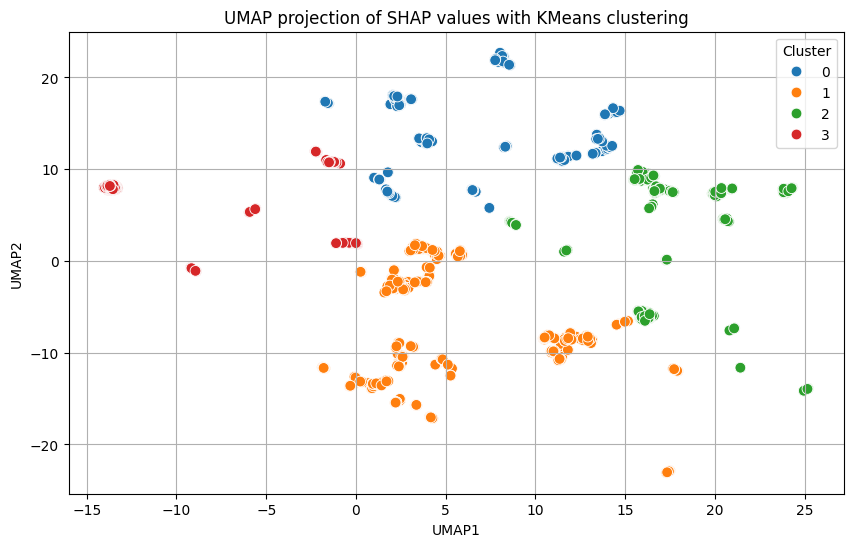

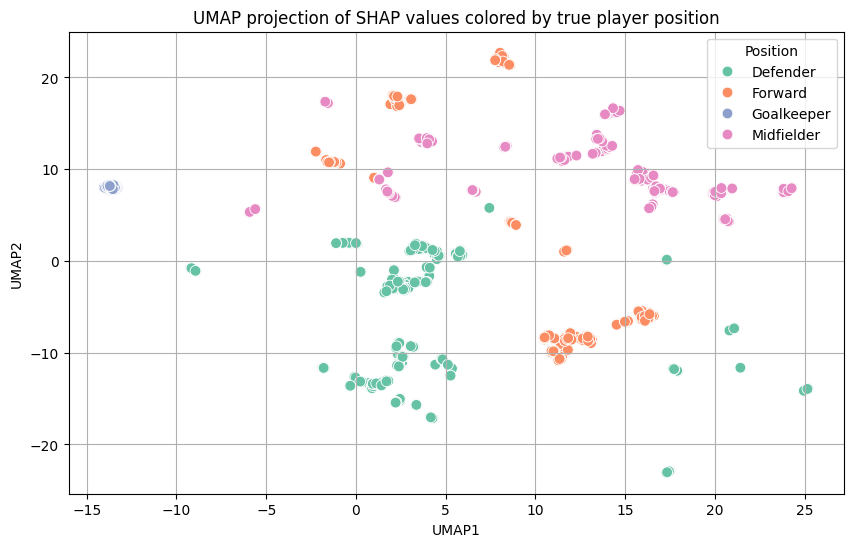

In [68]:
# Optional: Merge with labels for coloring
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels
umap_df['TruePosition'] = y.values  # or use label_encoder.inverse_transform(y_encoded)

# Step 3: Plot UMAP + KMeans clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='tab10', s=60)
plt.title("UMAP projection of SHAP values with KMeans clustering")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Optional: Plot with true position labels instead of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='TruePosition', palette='Set2', s=60)
plt.title("UMAP projection of SHAP values colored by true player position")
plt.legend(title="Position")
plt.grid(True)
plt.show()

# Plots

## Ball Recovery

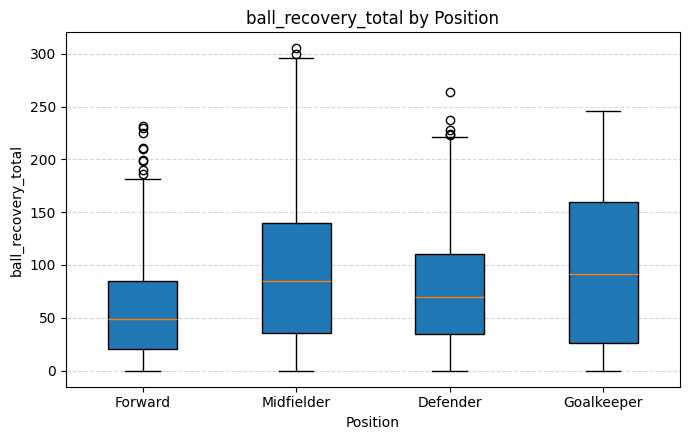

In [7]:
# Filter the data for each position
def boxplot(df, column):
    import matplotlib.pyplot as plt
    positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]
    data = [df[df["position"] == position][column] for position in positions]
    # Create a single plot with side-by-side boxplots
    plt.figure(figsize=(7, 4.5))
    plt.boxplot(data, vert=True, patch_artist=True, labels=positions)
    plt.title(f"{column} by Position")
    plt.xlabel("Position")
    plt.ylabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

column = "ball_recovery_total"
boxplot(df, column)

## Ball Pressure

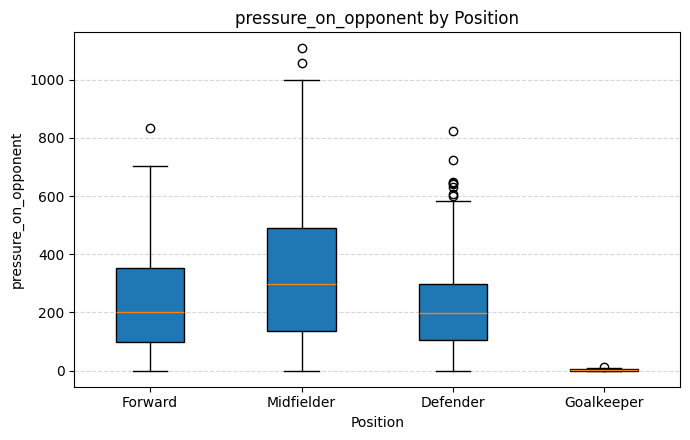

In [8]:
column = "pressure_on_opponent"
boxplot(df, column)

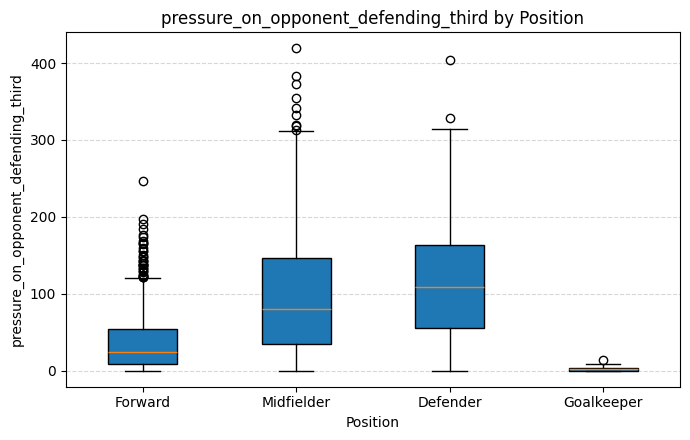

In [9]:
column = "pressure_on_opponent_defending_third"
boxplot(df, column)

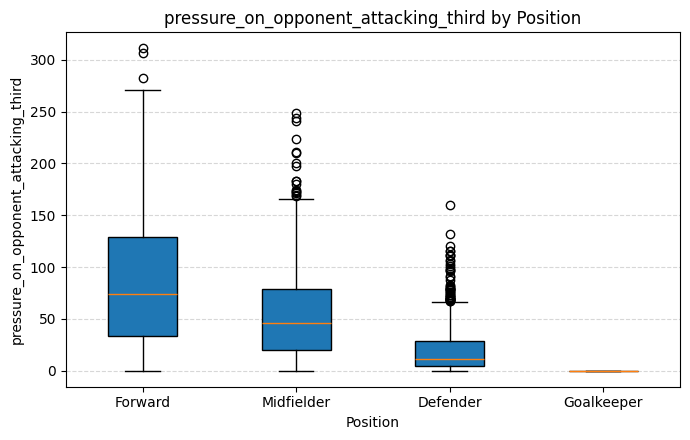

In [10]:
column = "pressure_on_opponent_attacking_third"
boxplot(df, column)

## Counterpressing

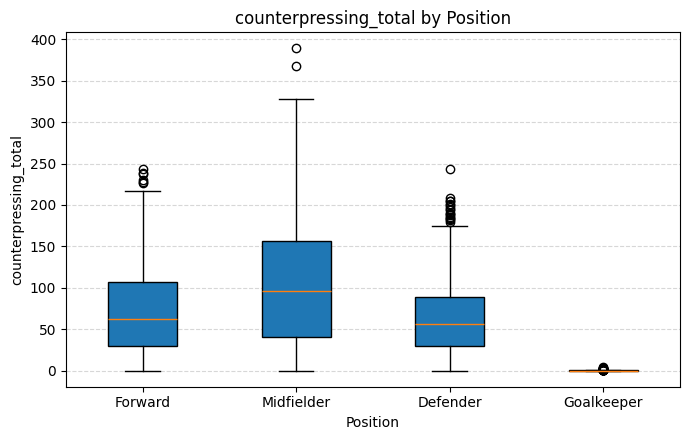

In [11]:
column = "counterpressing_total"
boxplot(df, column)

### By Teams

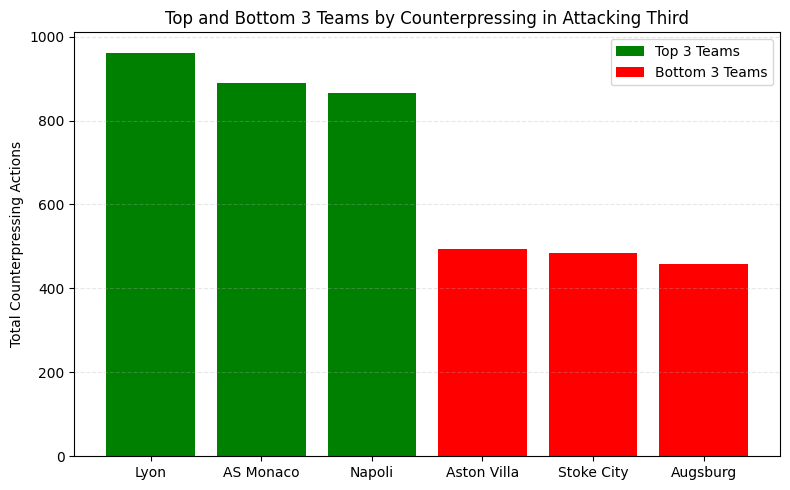

In [12]:
import matplotlib.pyplot as plt

top_pressing = df.groupby("team")["counterpressing_attacking_third"].sum().sort_values(ascending=False).head(3)
tail_pressing = df.groupby("team")["counterpressing_attacking_third"].sum().sort_values(ascending=False).tail(3)


# Kombinieren
combined = pd.concat([top_pressing, tail_pressing])
colors = ['green'] * 3 + ['red'] * 3

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(combined.index, combined.values, color=colors)

# Legende manuell erstellen
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Top 3 Teams'),
    Patch(facecolor='red', label='Bottom 3 Teams')
]
plt.legend(handles=legend_elements)

plt.title("Top and Bottom 3 Teams by Counterpressing in Attacking Third")
plt.ylabel("Total Counterpressing Actions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [13]:
defending

,ball_recovery_total,ball_recovery_successful,ball_recovery_offensive_total,ball_recovery_offensive_successful,ball_recovery_failed,pressure_on_opponent,pressure_on_opponent_defending_third,pressure_on_opponent_middle_third,pressure_on_opponent_attacking_third,counterpressing_total,...,fouls_yellow_card_per_match,fouls_second_yellow_card_per_match,fouls_red_card_per_match,bad_behaviour_total_per_match,bad_behaviour_yellow_card_per_match,bad_behaviour_second_yellow_card_per_match,bad_behaviour_red_card_per_match,total_yellow_per_match,total_red_per_match,position
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,108.0,103.0,0,0,5,359.0,65.0,190.0,104.0,107.0,...,0.011,0.000,0.000,0.011,0.011,0.0,0.0,0.022,0.000,Midfielder
Adam Hloušek,8.0,8.0,0,0,0,52.0,32.0,18.0,2.0,15.0,...,0.011,0.000,0.000,0.000,0.000,0.0,0.0,0.011,0.000,Defender
Adelino André Vieira Freitas,133.0,130.0,0,0,3,296.0,106.0,149.0,41.0,95.0,...,0.033,0.000,0.000,0.000,0.000,0.0,0.0,0.033,0.000,Forward
Admir Mehmedi,76.0,73.0,1,1,3,315.0,51.0,159.0,105.0,100.0,...,0.011,0.000,0.000,0.011,0.011,0.0,0.0,0.022,0.000,Midfielder
Adnan Januzaj,6.0,6.0,0,0,0,37.0,3.0,16.0,18.0,14.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Édgar Osvaldo Barreto Cáceres,91.0,86.0,1,1,5,649.0,255.0,311.0,83.0,195.0,...,0.033,0.000,0.000,0.000,0.000,0.0,0.0,0.033,0.000,Midfielder
Łukasz Skorupski,148.0,148.0,0,0,0,3.0,3.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.022,0.022,0.0,0.0,0.022,0.000,Goalkeeper
Ştefan Daniel Radu,71.0,66.0,0,0,5,141.0,64.0,63.0,14.0,41.0,...,0.022,0.000,0.011,0.011,0.011,0.0,0.0,0.033,0.011,Defender
